# Simulación de una red neuronal convolucional simple

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Diciembre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene la construcción de una red neuronal convolucional para clasificación de imágenes.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- tensorflow (2.17.1)
- matplotlib (3.8.0)
- cv2 (4.10.0)

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

# Carga de datos

In [2]:
datos, metadatos = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.ZLSLDD_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


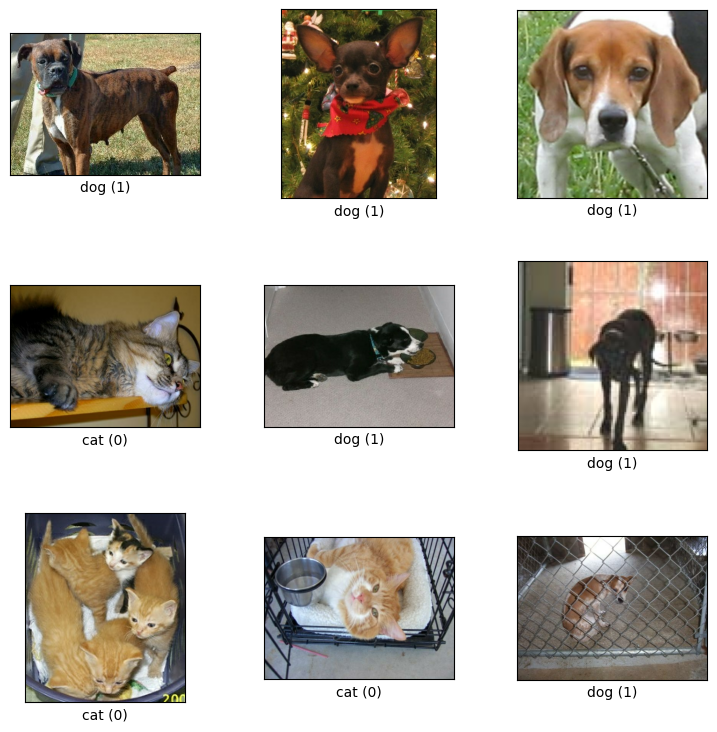

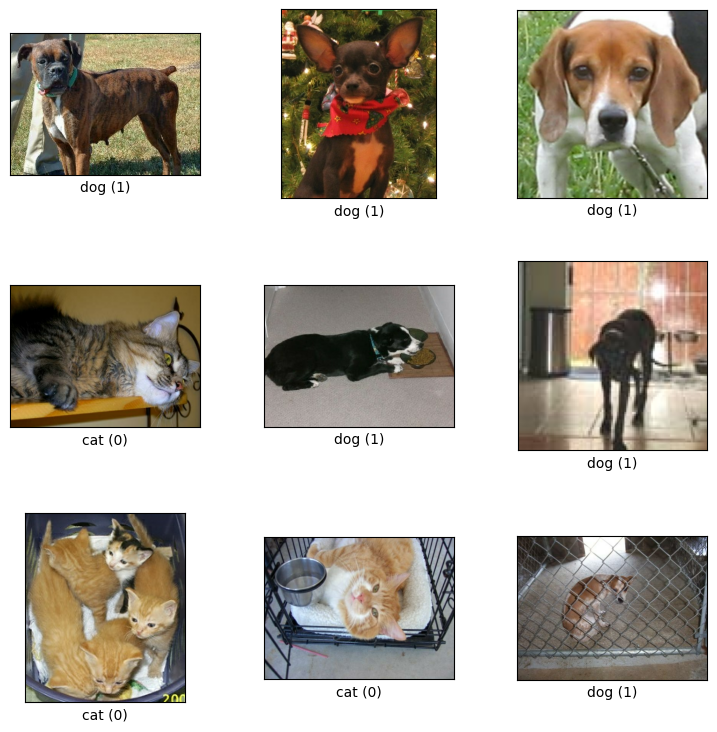

In [4]:
tfds.show_examples(datos["train"], metadatos)

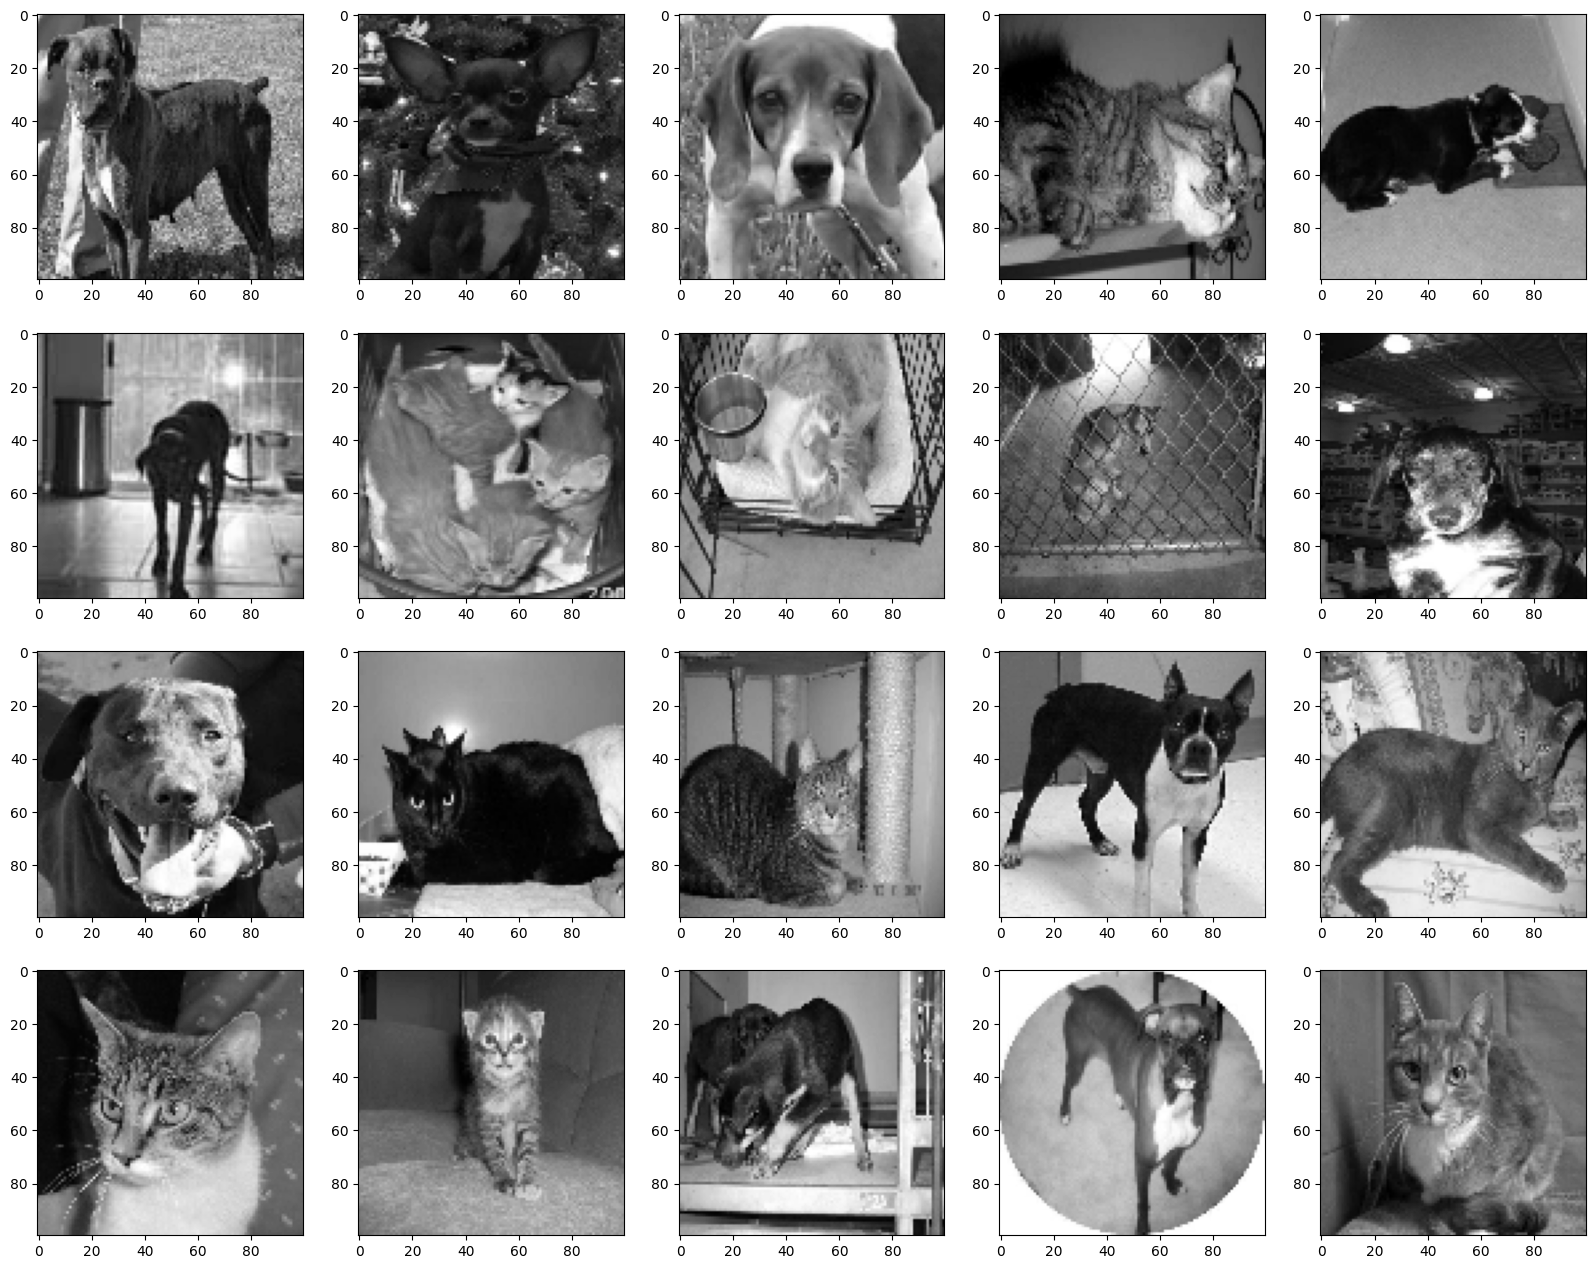

In [5]:
plt.figure(figsize=(20,20))

TAMANO_IMG=100

# redimensionamos solo a 25 imgs
for i, (imagen, etiqueta) in enumerate(datos["train"].take(20)):
  # a. Redimensionamos las imágenes a 100x100px:
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  # b. Pasamos de color a escala de grises:
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

# Preparación datos

In [6]:
# Constantes
TAMANO_IMG = 100  # Tamaño de la imagen
PORCENTAJE_ENTRENAMIENTO = 0.8  # 80% para entrenamiento

In [7]:
# Crea una lista para almacenar las imágenes de entrenamiento.
datos_entrenamiento = []

In [8]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  # Preprocesamiento imagen: color y tamaño
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) # 1 canal de color.
  # Estandarización
  imagen = imagen / 255
  # Almacena lista de dos posiciones (los pixeles de la imagen y su etiqueta)
  datos_entrenamiento.append([imagen, etiqueta])

In [9]:
# Mezclar aleatoriamente los datos
random.shuffle(datos_entrenamiento)

# Dividir datos en entrenamiento y prueba
limite_entrenamiento = int(len(datos_entrenamiento) * PORCENTAJE_ENTRENAMIENTO)
datos_entrenamiento_np = np.array(datos_entrenamiento, dtype=object)

imagenes_entrenamiento = datos_entrenamiento_np[:limite_entrenamiento, 0]
etiquetas_entrenamiento = datos_entrenamiento_np[:limite_entrenamiento, 1]

imagenes_prueba = datos_entrenamiento_np[limite_entrenamiento:, 0]
etiquetas_prueba = datos_entrenamiento_np[limite_entrenamiento:, 1]


In [10]:
# Convertir a tensores y preparar los datos
datos_entrenamiento_tf = tf.data.Dataset.from_tensor_slices((list(imagenes_entrenamiento), list(etiquetas_entrenamiento)))
datos_prueba_tf = tf.data.Dataset.from_tensor_slices((list(imagenes_prueba), list(etiquetas_prueba)))

# Aplicar batching y optimización
datos_entrenamiento_tf = datos_entrenamiento_tf.batch(32).shuffle(1000).prefetch(tf.data.AUTOTUNE)
datos_prueba_tf = datos_prueba_tf.batch(32).prefetch(tf.data.AUTOTUNE)

In [11]:
# Total observaciones en entrenamiento
len(datos_entrenamiento_np)

23262

In [12]:
# Seta los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

# Red neuronal convolucional

<img src=https://miro.medium.com/v2/resize:fit:750/format:webp/1*bGjusyTjh2SACnkkMHU_hA.png>

(Fuente: https://medium.com/@jajp2203/clasificaci%C3%B3n-de-im%C3%A1genes-con-redes-profundas-a229774e53f4)

## Crea modelo

In [13]:
modelo = tf.keras.Sequential(name = 'red_gatos_perros')

## Agrega capas

### 1. Capa de entrada

In [14]:
modelo.add(tf.keras.layers.Input(shape=(100, 100, 1), name="capa_entrada"))

### 2. Primera convolución

In [15]:
modelo.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", name="convolucion_1"))

### 3. Primer max pooling

In [16]:
modelo.add(tf.keras.layers.MaxPooling2D(2, 2, name="Max_pooling_1"))

### 4. Segunda convolución

In [17]:
modelo.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", name='convolucion_2'))

### 5. Segundo max pooling

In [18]:
modelo.add(tf.keras.layers.MaxPooling2D(2, 2, name="Max_pooling_2"))

### 6. Tercera convolución

In [19]:
modelo.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu", name='convolucion_3'))

### 7. Tercer max pooling

In [20]:
modelo.add(tf.keras.layers.MaxPooling2D(2, 2, name="Max_pooling_3"))

### 8. Flatten

In [21]:
modelo.add(tf.keras.layers.Flatten(name="flatten"))

### 9. Capa densa

In [22]:
modelo.add(tf.keras.layers.Dense(100, activation="relu", name="densa_1"))

## 10. Capa de salida

In [23]:
modelo.add(tf.keras.layers.Dense(1, activation="sigmoid", name="capa_salida"))

## Resumen arquitectura de la red

In [24]:
modelo.summary()

Model: "red_gatos_perros"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_pooling_1 (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_pooling_2 (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_3 (Conv2D)               │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Max_pooling_3 (MaxPooling2D)         │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densa_1 (Dense)                      │ (None, 100)                 │       1,280,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_salida (Dense)                  │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,372,873 (5.24 MB)

 Trainable params: 1,372,873 (5.24 MB)

 Non-trainable params: 0 (0.00 B)

## Compilación de la red

In [25]:
modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy", # se usa esta pérdida porque es un problema binario
    metrics=["accuracy"]
)

## Entrenamiento de la red

In [26]:
history = modelo.fit(
    datos_entrenamiento_tf, batch_size=32,
    validation_data=datos_prueba_tf,
    epochs=3, shuffle=False
)

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 407s 690ms/step - accuracy: 0.5731 - loss: 0.6662 - val_accuracy: 0.7430 - val_loss: 0.5243
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 408s 630ms/step - accuracy: 0.7528 - loss: 0.5095 - val_accuracy: 0.7730 - val_loss: 0.4633
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 365s 623ms/step - accuracy: 0.7986 - loss: 0.4323 - val_accuracy: 0.8214 - val_loss: 0.4044


In [27]:
history.history

{'accuracy': [0.6357138752937317, 0.7613520622253418, 0.8017088770866394],
 'loss': [0.6219814419746399, 0.49192091822624207, 0.42780402302742004],
 'val_accuracy': [0.7429615259170532, 0.7730496525764465, 0.8214055299758911],
 'val_loss': [0.5243187546730042, 0.46330586075782776, 0.4043862223625183]}

In [28]:
history.history['accuracy'][-1]

0.8017088770866394

# Usando la red - Predicciones

In [29]:
for imagenes, etiquetas_reales in datos_prueba_tf.take(1):  # Tomar solo un lote
    predicciones = modelo.predict(imagenes)
    predicciones_clases = tf.where(predicciones > 0.5, 1, 0)
    print("Etiquetas reales:", etiquetas_reales.numpy())
    print("Predicciones:", predicciones.flatten())
    print("Clases predichas:", predicciones_clases.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Etiquetas reales: [0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0]
Predicciones: [0.41224837 0.99085814 0.24924412 0.9048515  0.09581131 0.97124916
 0.07043586 0.5126724  0.42321616 0.87915224 0.27336878 0.00275388
 0.9534418  0.14893429 0.22711396 0.16462915 0.02157323 0.7468172
 0.22034793 0.5490003  0.8330129  0.22277996 0.643846   0.71379554
 0.01850189 0.05227273 0.9304104  0.7931649  0.25249004 0.29425257
 0.08220443 0.1506185 ]
Clases predichas: [[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [30]:
len(datos_prueba_tf)

146

In [31]:
errores_totales = 0
for imagenes, etiquetas_reales in datos_prueba_tf:
    predicciones = modelo.predict(imagenes)
    predicciones_clases = tf.where(predicciones > 0.5, 1, 0)  # Clasificación binaria
    etiquetas_reales = tf.reshape(etiquetas_reales, predicciones_clases.shape)  # Igualar forma

    # Asegúrate de que ambas tengan el mismo tipo
    predicciones_clases = tf.cast(predicciones_clases, tf.int64)

    # Comparar las etiquetas reales con las predicciones
    errores = tf.reduce_sum(tf.cast(predicciones_clases != etiquetas_reales, tf.int64))
    errores_totales += errores.numpy()

print(f"Errores totales en el conjunto de prueba: {errores_totales}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


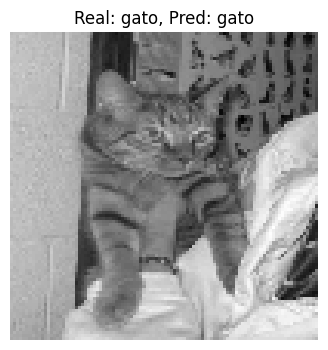

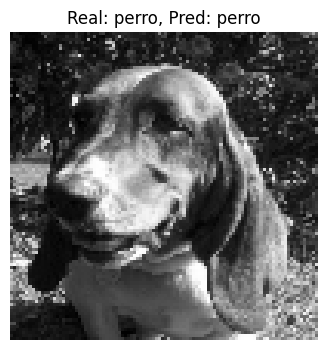

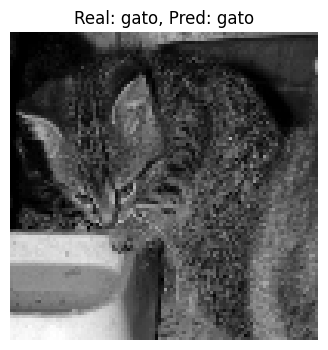

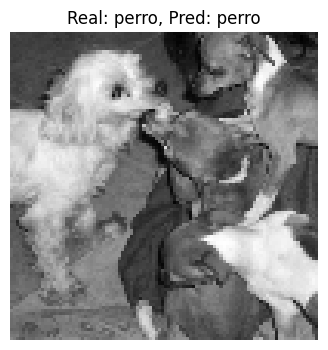

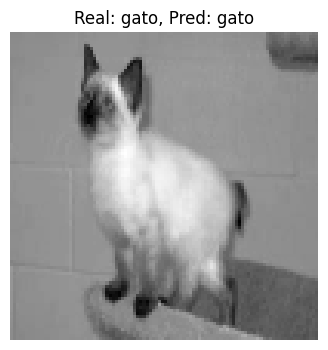

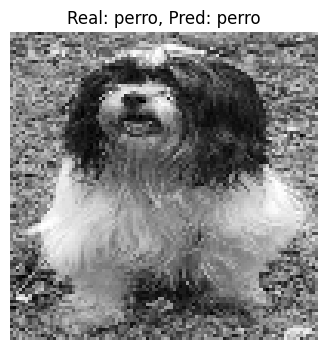

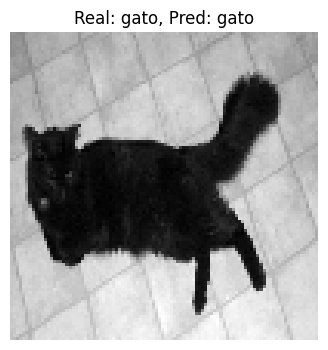

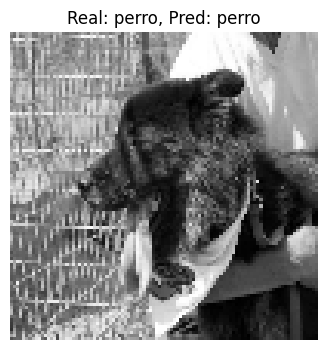

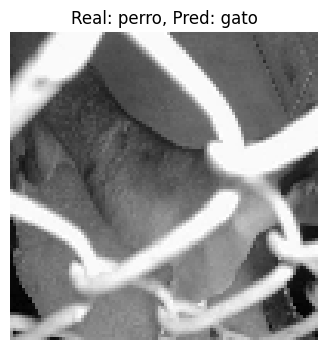

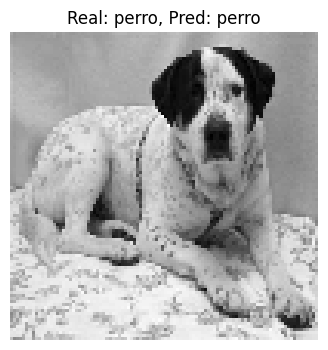

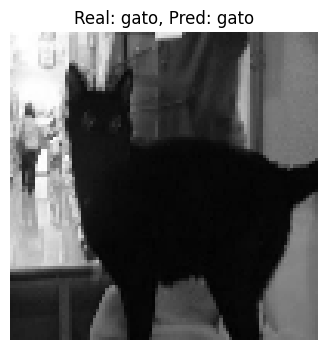

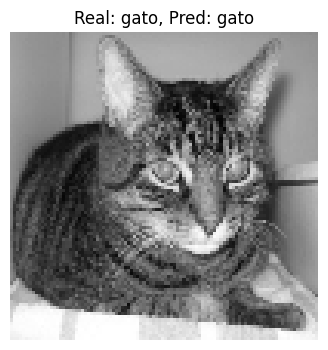

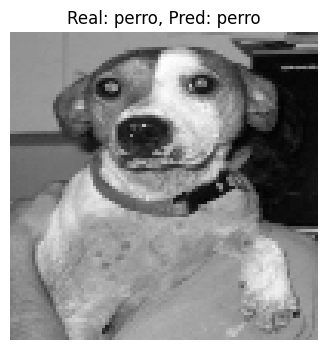

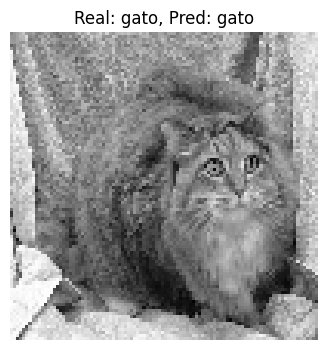

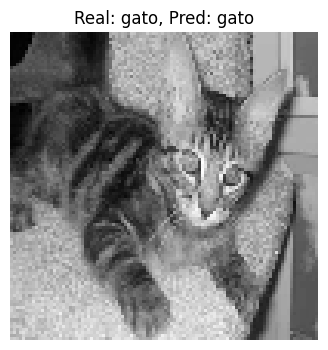

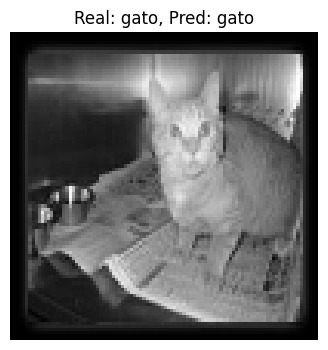

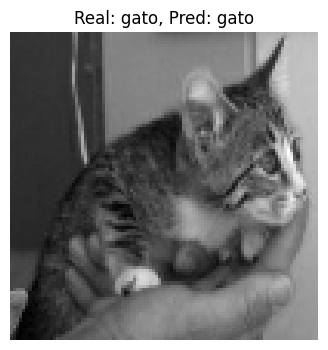

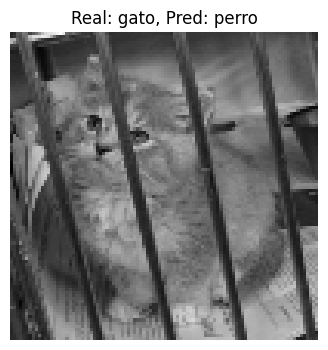

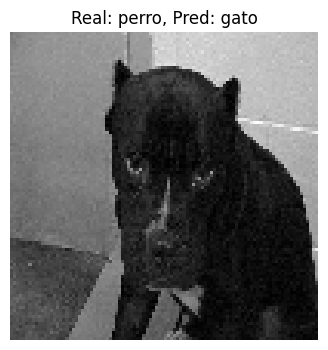

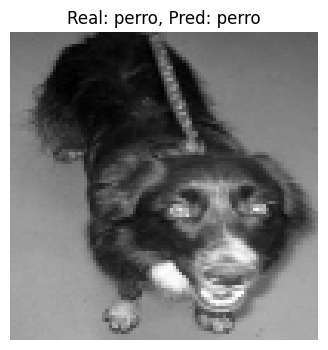

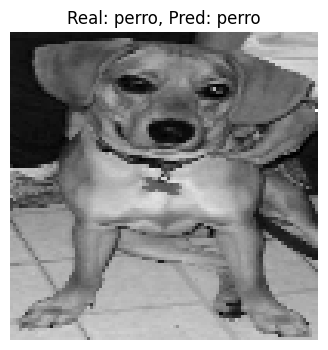

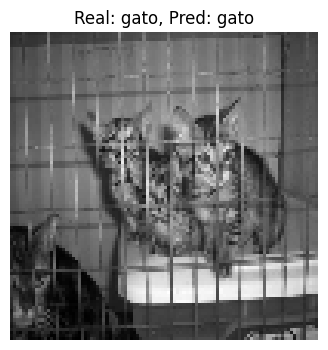

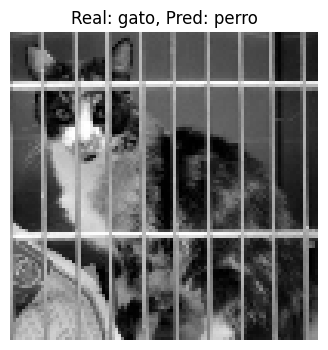

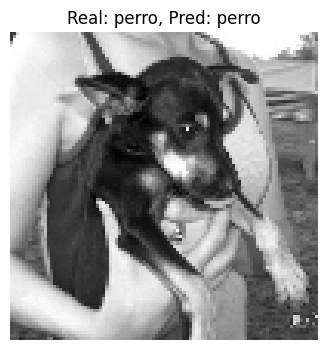

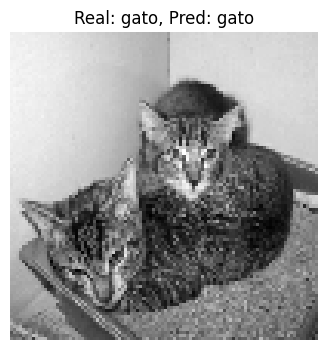

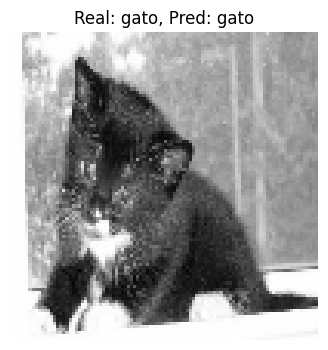

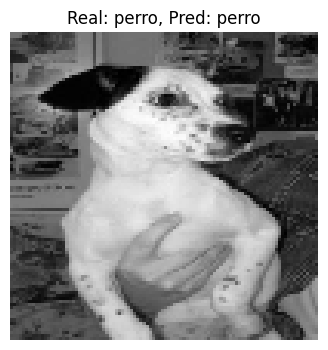

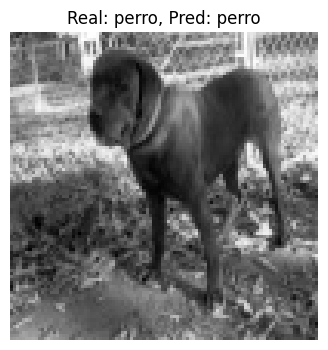

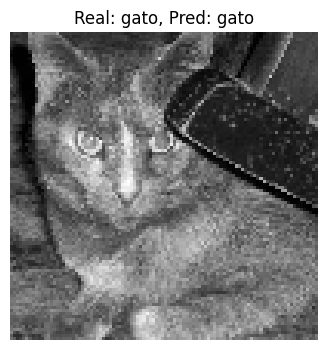

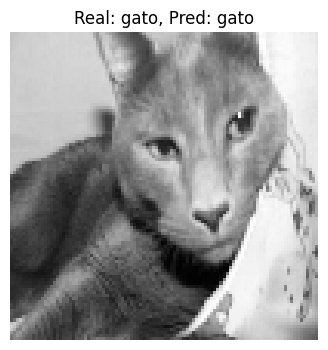

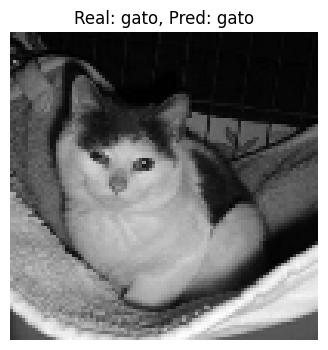

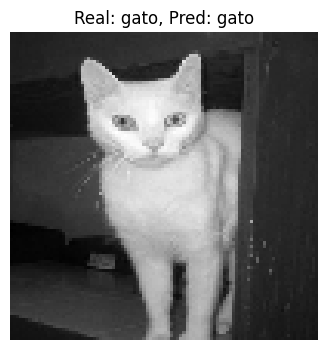

In [32]:

# Iterar sobre un lote de datos de prueba
for imagenes, etiquetas_reales in datos_prueba_tf.take(1):  # Tomamos un solo lote
    predicciones = modelo.predict(imagenes)  # Predicciones del modelo
    predicciones_clases = tf.where(predicciones > 0.5, 1, 0)  # Clasificación binaria

    # Iterar sobre cada imagen del lote
    for i in range(len(imagenes)):
        plt.figure(figsize=(4, 4))  # Tamaño de la figura
        imagen = imagenes[i].numpy().squeeze()  # Elimina dimensiones no necesarias

        # Mostrar la imagen
        plt.imshow(imagen, cmap="gray")  # Cambiar a "gray" si es escala de grises
        plt.axis("off")  # Sin ejes

        # Etiqueta real y predicha
        etiqueta_real = etiquetas_reales[i].numpy()
        etiqueta_predicha = predicciones_clases[i].numpy()

        # Título con etiquetas

        plt.title(f"Real: {'perro' if etiqueta_real else 'gato'}, Pred: {'perro' if etiqueta_predicha else 'gato'}", fontsize=12)
        plt.show()

